In [39]:
!pip install statsmodels


Usage:   
  pip <command> [options]

no such option: -m


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import scipy.stats as stats
from sklearn import preprocessing

ModuleNotFoundError: No module named 'statsmodels'

In [3]:
filename = "dataset/labor.csv"
labor = pd.read_csv(filename, sep='\t')
labor.head()

,Unnamed: 0,etytr,indicator,alp,er-cv,leukocyty,hbver,alt,trombocyty,ast,weight,ssn,relationship,hematokrit,smoker,hemoglobin,erytrocyty,name
0,0,6.56611,0.0,71.34866,49.93293,4.01096,7.63611,16.53642,4.12686,62.82161,38.94182,613-31-7943,married,6.15761,no,7.24929,7.40249,Terry Walker
1,1,6.57510,0.0,73.19819,50.61146,7.36386,4.45735,12.41316,6.89853,64.10856,39.93677,071-29-7068,widowed,5.02794,no,7.41189,7.05999,Christopher Mccall
2,2,7.46203,1.0,12.80221,45.76702,7.86319,6.46036,7.75601,6.02906,62.88964,36.82128,465-01-6369,married,4.67262,Y,9.91113,5.59064,Mrs. Alisha Jackson DVM
3,3,5.15667,1.0,86.69531,41.73339,4.49672,3.99015,3.84333,6.71704,72.09725,64.70210,698-87-9617,single,6.40977,Y,6.55248,5.71480,Crystal Dean
4,4,4.25219,1.0,11.50857,43.33880,3.68340,8.19481,6.28617,6.51026,66.57561,-3.98413,209-04-2399,separated,5.65006,no,3.15066,5.61537,Joseph Garza


In [4]:
filename = "dataset/profiles.csv"
profiles = pd.read_csv(filename, sep='\t')
profiles.head()

,Unnamed: 0,blood_group,job,sex,name,company,race,ssn,birthdate,current_location
0,0,A-,Pension scheme manager,F,Megan Wells,Smith-Lawrence,Indian,788-45-8299,"08/15/1913, 00:00:00","(Decimal('-2.7462585'), Decimal('-56.259761'))"
1,1,AB+,"Psychotherapist, child",F,Barbara Patel,Oneal and Sons,Hawaiian,291-49-5180,"10/29/1905, 00:00:00","(Decimal('-54.1724985'), Decimal('163.273340'))"
2,2,B-,"Engineer, drilling",F,Brianna Lane,Morris-Arnold,Asian,146-49-1796,1980/05/13,"(Decimal('39.8342665'), Decimal('-54.720127'))"
3,3,A-,"Engineer, mining",M,William Cooper,Dunn LLC,White,700-73-0733,1921-12-14,"(Decimal('-76.8352515'), Decimal('-0.539735'))"
4,4,A+,Restaurant manager,F,Holly Williams,Bailey-Sullivan,White,748-70-9973,1924-12-30,"(Decimal('-59.667122'), Decimal('81.468274'))"


# 1. Základný opis dát spolu s ich charakteristikami
- počet záznamov,
- počet atribútov,
- ich typy,
- pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.

In [5]:
# number of records profiles
profiles.shape[0]

3123

In [6]:
# number of records labor
labor.shape[0]

9976

In [7]:
# number of atributes profiles
profiles.columns.size

10

In [8]:
# number of atributes labor
labor.columns.size

18

In [9]:
# types of atributes profiles
profiles.dtypes

Unnamed: 0           int64
blood_group         object
job                 object
sex                 object
name                object
company             object
race                object
ssn                 object
birthdate           object
current_location    object
dtype: object

In [10]:
# types of atributes labor
labor.dtypes

Unnamed: 0        int64
etytr           float64
indicator       float64
alp             float64
er-cv           float64
leukocyty       float64
hbver           float64
alt             float64
trombocyty      float64
ast             float64
weight          float64
ssn              object
relationship     object
hematokrit      float64
smoker           object
hemoglobin      float64
erytrocyty      float64
name             object
dtype: object

<AxesSubplot:>

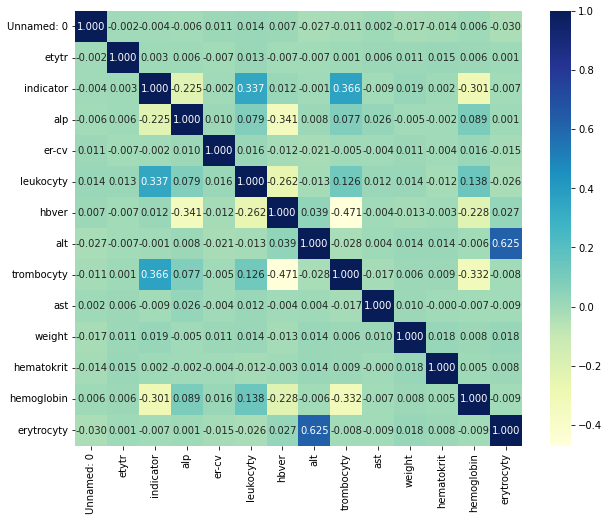

In [11]:
# Correlations heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(labor.corr(), ax=ax,cmap="YlGnBu", annot=True, fmt=".3f")

In [12]:
labor[['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt']].describe()

,hemoglobin,hbver,trombocyty,leukocyty,alt
count,9946.000000,9946.000000,9946.000000,9946.000000,9946.000000
mean,6.200070,5.783637,6.584805,5.396771,9.167064
std,1.705544,1.682270,1.471984,1.549857,3.934239
min,0.810320,0.465590,0.967360,0.000000,0.000000
25%,4.925607,4.552373,5.644348,4.279130,6.836912
50%,6.222180,5.928270,6.708440,5.185765,8.660790
75%,7.421258,7.065975,7.569437,6.421222,10.754530
max,12.119600,11.636340,11.911000,11.345060,100.000000


In [13]:
labor[['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt']].median()

hemoglobin    6.222180
hbver         5.928270
trombocyty    6.708440
leukocyty     5.185765
alt           8.660790
dtype: float64

In [14]:
labor[['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt']].skew()

hemoglobin    0.045604
hbver        -0.255204
trombocyty   -0.230527
leukocyty     0.389468
alt           3.683199
dtype: float64

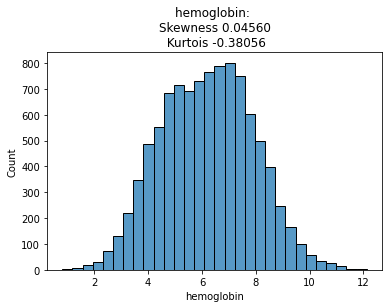

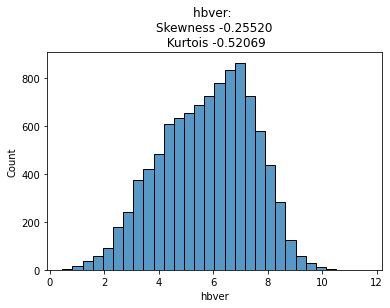

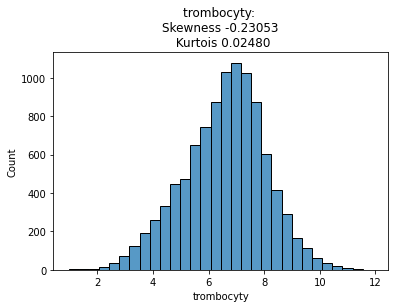

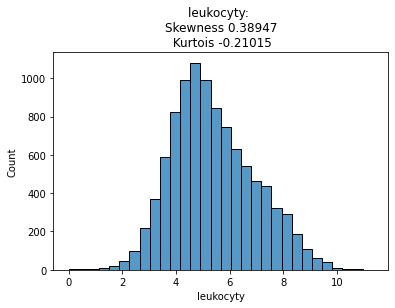

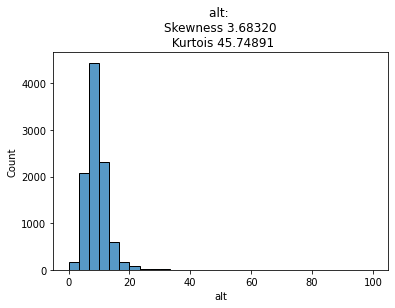

In [15]:
sns.histplot(labor.hemoglobin, bins=30)
plt.title("hemoglobin: \n""Skewness %.5f\n Kurtois %.5f" % (labor.hemoglobin.skew(), labor.hemoglobin.kurtosis()))
plt.show()

sns.histplot(labor.hbver, bins=30)
plt.title("hbver: \n""Skewness %.5f\n Kurtois %.5f" % (labor.hbver.skew(), labor.hbver.kurtosis()))

plt.show()

sns.histplot(labor.trombocyty, bins=30)
plt.title("trombocyty: \n""Skewness %.5f\n Kurtois %.5f" % (labor.trombocyty.skew(), labor.trombocyty.kurtosis()))
plt.show()

sns.histplot(labor.leukocyty, bins=30)
plt.title("leukocyty: \n""Skewness %.5f\n Kurtois %.5f" % (labor.leukocyty.skew(), labor.leukocyty.kurtosis()))
plt.show()

sns.histplot(labor.alt, bins=30)
plt.title("alt: \n""Skewness %.5f\n Kurtois %.5f" % (labor.alt.skew(), labor.alt.kurtosis()))
plt.show()


# 2. Párová analýza
- Preskúmajte vzťahy medzi zvolenými dvojicami atribútov.
- Identifikujte závislostí medzi dvojicami atribútov a závislosti medzi predikovanou premennou a ostatnými premennými.

<AxesSubplot:>

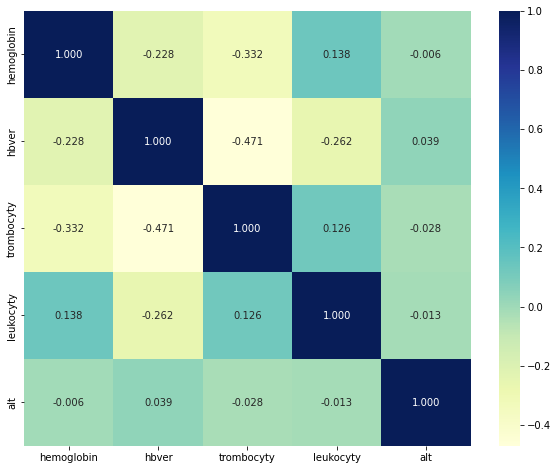

In [16]:
# Correlations heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(labor[['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt']].corr(), ax=ax,cmap="YlGnBu", annot=True, fmt=".3f")

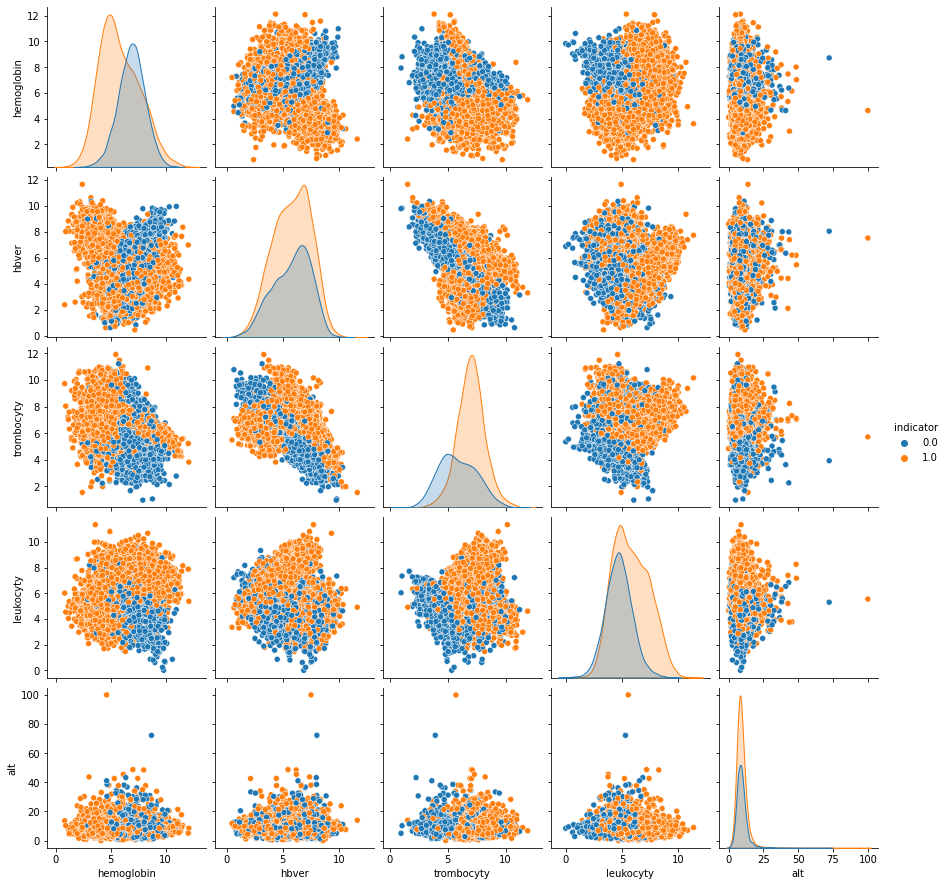

In [17]:
sns.pairplot(labor[['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt', 'indicator']], hue='indicator')

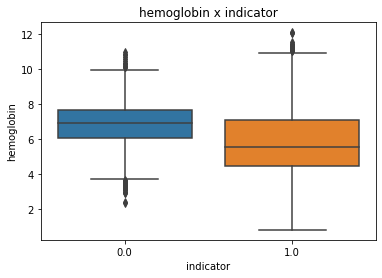

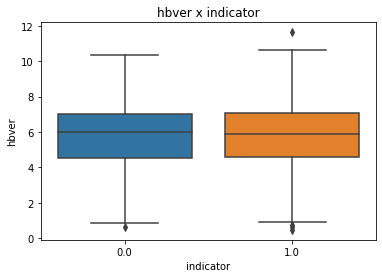

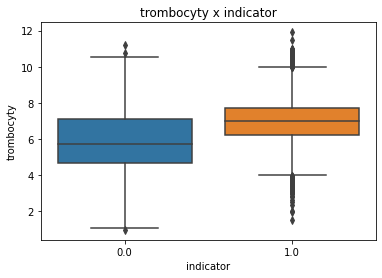

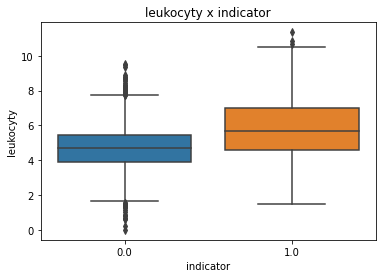

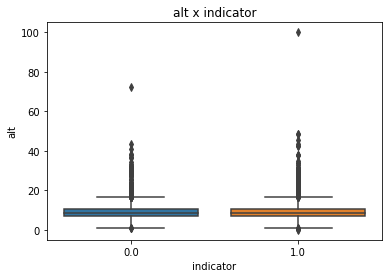

In [18]:
for attr in ['hemoglobin', 'hbver', 'trombocyty', 'leukocyty', 'alt']:
    sns.boxplot(data=labor, x='indicator', y=attr)
    plt.title(attr + ' x indicator')
    plt.show()

# 3. Formulácia a štatistické overenie hypotéz o dátach (2 body)
- Sformulujte dve hypotézy o dátach v kontexte zadanej predikčnej úlohy. Príkladom je napr. pacienti v zlepšenom stave majú v priemere inú (vyššiu/nižšiu) hodnotu nejakej látky alebo hormónu ako pacienti v nezlepšenom stave.
- Sformulované hypotézy overte vhodne zvoleným štatistickým testom.


## Hypotéza 1
*H0*: Ak je hodnota hemoglobínu v priemere menšia ako u zdravých pacientov, tak pacient potrebuje daľšie vyšetrenie. 
*HA*: Hodnota hemoglobínu je v priemere menšia a pacient nepotrebuje vyšetrenie. 


In [19]:
healthy = labor.loc[labor.indicator == 0, 'hemoglobin'] 

In [20]:
healthy.describe()

count    3562.000000
mean        6.887613
std         1.217612
min         2.368140
25%         6.090463
50%         6.913745
75%         7.689430
max        10.978090
Name: hemoglobin, dtype: float64

<AxesSubplot:xlabel='hemoglobin', ylabel='Count'>

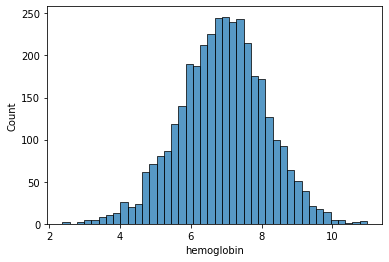

In [21]:
sns.histplot(healthy)

In [22]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    return a[(a > upper) | (a < lower)]

In [23]:
healthy_out = identify_outliers(healthy)
healthy_out

Series([], Name: hemoglobin, dtype: float64)

In [28]:
unhealthy = labor.loc[labor.indicator == 1, 'hemoglobin'] 

In [29]:
unhealthy.describe()

count    6384.000000
mean        5.816450
std         1.814958
min         0.810320
25%         4.463610
50%         5.554245
75%         7.080860
max        12.119600
Name: hemoglobin, dtype: float64

<AxesSubplot:xlabel='hemoglobin', ylabel='Count'>

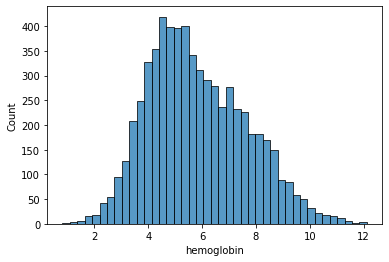

In [30]:
sns.histplot(unhealthy)

In [32]:
unhealthy_out = identify_outliers(unhealthy)
unhealthy_out

Series([], Name: hemoglobin, dtype: float64)

Outliers neboli najdení tým pádom ich nebolo treba odstraňovať.

In [33]:
sm.ProbPlot(mpg6, fit=True).qqplot(line='45')

NameError: name 'sm' is not defined

## Hypotéza 2
**

# 4. Identifikácia problémov v dátach s navrhnutým riešením
- Identifikujte problémy v dátach napr.: nevhodná štruktúra dát, duplicitné záznamy, nejednotné formáty, chýbajúce hodnoty, vychýlené hodnoty.
- V dátach sa môžu nachádzať aj iné, tu nevymenované problémy.
- Navrhnuté riešenie prvotne realizujte na dátach. Problém s dátami môžete riešiť iteratívne v každej fáze aj vo všetkých fázach podľa potreby.

In [ ]:
# Number of Na profiles
profiles.shape[0] - profiles.dropna().shape[0]

In [ ]:
# Number of Na labor
labor.shape[0] - labor.dropna().shape[0]

In [ ]:
labor.isnull().sum()

In [ ]:
profiles.info()

In [ ]:
labor.info()

In [ ]:
# List all rows containing null values
labor[labor.isnull().any(axis=1)]

In [ ]:
#save data to file 
#df.to_csv('dataset/<filename>.tsv', sep='\t', index=False, encoding='utf-8')

In [ ]:
labor = labor.rename(columns={'Unnamed: 0':'id_labor'})
labor.set_index('id_labor')

In [ ]:
# Weight is below 0
labor[labor['weight'] < 0]

In [ ]:
labor.hist(column='weight', legend=1, bins=50)

In [ ]:
labor[labor['weight'] <= 0].hist(column='weight', legend=1, bins=50)

In [ ]:
len(labor[labor['weight'] <= 0])

In [ ]:
#convert to date 
profiles.birthdate = pd.to_datetime(profiles.birthdate)

In [ ]:
profiles = profiles.rename(columns={'Unnamed: 0':'id_profiles'})
profiles.set_index('id_profiles')

In [ ]:
profiles.groupby('race').count()

In [ ]:
# Replace typos in race
profiles['race'].replace({'blsck':'Black', 'black':'Black', 'white':'White'}, inplace=True)

In [ ]:
profiles.groupby('race').count().iloc[:,0]

In [ ]:
labor.groupby('smoker').count()

In [ ]:
# normalize smoker answers for binary attributes
labor['smoker'].replace({'N':0, 'Y':1, 'no':0, 'yes':0}, inplace=True)

In [ ]:
labor.groupby('smoker').count()

In [ ]:
labor.groupby('relationship').count()

In [ ]:
labor['relationship'].replace({'divoced':'divorced'})

In [ ]:
profiles.groupby('blood_group').count()

In [ ]:
profiles.groupby('job').count()

In [ ]:
profiles.groupby('sex').count()

In [ ]:
records = pd.merge(labor, profiles, left_on='ssn', right_on='ssn', how='left')

In [ ]:
records[['smoker', 'indicator']].corr()

In [ ]:
# 
records.head()